In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("seaborn")

# Data Preperation

In [3]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


# Data Visualisation

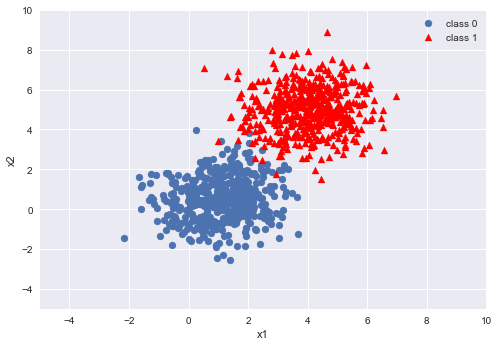

In [6]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='red',marker='^',label='class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [7]:
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [10]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,2]=1.0
print(data)

[[ 0.12379073  1.4622824   0.        ]
 [ 0.73793016  1.90669574  0.        ]
 [-0.02773628  0.84856657  0.        ]
 ...
 [ 3.78839636  6.37084022  1.        ]
 [ 4.45867803  5.93375684  1.        ]
 [ 4.13429309  4.74511686  1.        ]]


In [14]:
np.random.shuffle(data)
print(data[:10])
X=data[:,:2]
Y=data[:,2]

[[ 4.59656178  6.97805267  1.        ]
 [ 1.24052391 -0.63691992  0.        ]
 [ 3.04827338 -1.42725127  0.        ]
 [ 4.34659214  5.32413492  1.        ]
 [ 4.56165184  4.38337602  1.        ]
 [-0.5467803   0.39876012  0.        ]
 [ 4.08750322  3.53808825  1.        ]
 [ 2.23966659  3.4024126   1.        ]
 [ 2.04858163  0.38987327  0.        ]
 [-0.25189627 -0.70402211  0.        ]]
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

# LOGISTIC REGRESSION

In [121]:
def hypothesis(x,w,b):
    '''input vector x,theta w,bias b'''
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    
    e=0.0
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        e+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    
    return -e/m

def get_grad(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
        
    grad_b/=m
    grad_w/=m
    
    return [grad_w,grad_b]
# one iteration of graadient descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grad(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
        
def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]
    

In [125]:

loss = []
acc = []

W = 2*np.random.random((x_train.shape[1],))
b = 5*np.random.random()
print(W,b)

[1.49973997 1.19281236] 2.4012356487609408


In [126]:
for i in range(1000):
    l,W,b = grad_descent(x_train,y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(x_test,y_test,W,b))
    loss.append(l)

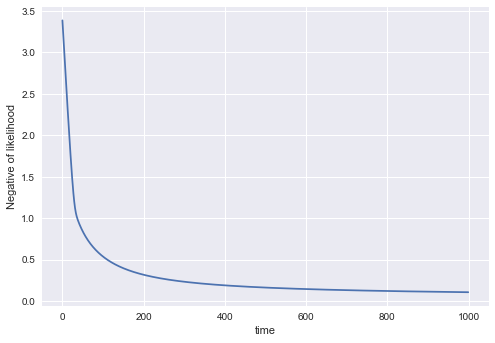

In [129]:
plt.plot(loss)
plt.xlabel("time")
plt.ylabel("Negative of likelihood")
plt.show()


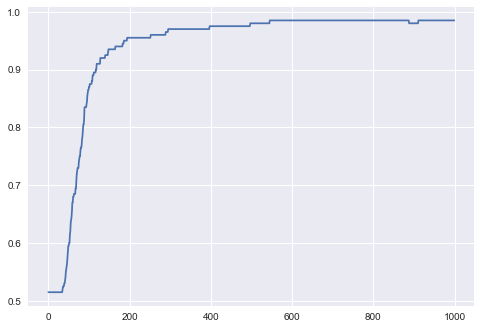

0.985


In [130]:
plt.plot(acc)
plt.show()
print(acc[-1])

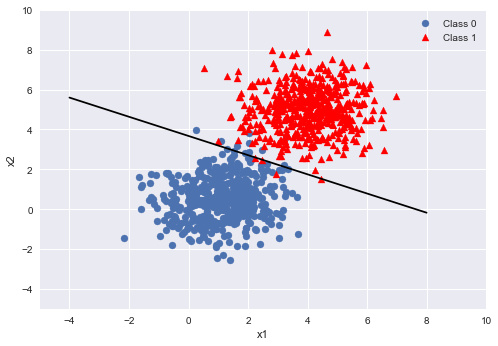

In [131]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [70]:
y=predict()


False


In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
model=LogisticRegression()

In [134]:
model.fit(x_train,y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
a=model.intercept_
print(a)

[-6.65604272]


In [137]:
b=model.coef_
print(b)

[[1.02123317 1.56999667]]


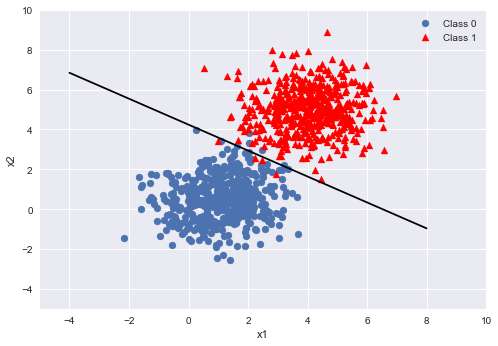

In [138]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(b[0][0]*x + a)/b[0][1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [141]:
model.predict(x_test)
model.score(x_test,y_test)

0.99